# Generate results plots

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("data/results/bert_atlas_base.csv")
data.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,lm,pattern,...,successful_patterns,successful_subjects,syntactic_consistency,syntactic_edges,total,total_both,total_lex,total_no,total_syn,unknowledgable_consistency
0,P937_consistency_probe_atlas-base,finished,-,lovhagstrom,"P937, probe",2023-03-29T15:59:35.000Z,6,NaN,atlas-base,P937,...,1.000000,0.813539,-1.000000,0,16840,15156,1684,0,0,0.847134
1,P740_consistency_probe_atlas-base,finished,-,lovhagstrom,"P740, probe",2023-03-29T15:59:23.000Z,7,NaN,atlas-base,P740,...,1.000000,0.921708,-1.000000,0,153426,43836,33720,0,0,0.623543
2,P495_consistency_probe_atlas-base,finished,-,lovhagstrom,"P495, probe",2023-03-29T15:59:12.000Z,7,NaN,atlas-base,P495,...,1.000000,0.933628,-1.000000,0,245888,97632,39776,0,0,0.650858
3,P413_consistency_probe_atlas-base,finished,-,lovhagstrom,"P413, probe",2023-03-29T15:59:03.000Z,4,NaN,atlas-base,P413,...,0.833333,0.819328,-1.000000,0,19040,5712,0,0,0,0.669186
4,P407_consistency_probe_atlas-base,finished,-,lovhagstrom,"P407, probe",2023-03-29T15:58:49.000Z,9,NaN,atlas-base,P407,...,1.000000,0.960667,0.926698,8,176190,38594,0,10068,6712,0.832612


In [6]:
data.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'lm', 'pattern', 'all_edges', 'avg_consistency_by_edge_out',
       'avg_entropy', 'both_consistency', 'both_edges', 'consistency',
       'consistent_subjects', 'group-unacc', 'knowledgable_consistency',
       'lama_acc', 'lama_group_acc', 'lexical_consistency', 'lexical_edges',
       'n_patterns', 'no_change_consistency', 'std_entropy',
       'successful_patterns', 'successful_subjects', 'syntactic_consistency',
       'syntactic_edges', 'total', 'total_both', 'total_lex', 'total_no',
       'total_syn', 'unknowledgable_consistency'],
      dtype='object')

In [7]:
data.groupby(["lm"]).agg({"consistency": ["mean", "std"], "lama_acc": ["mean", "std"], "lama_group_acc": ["mean", "std"], "knowledgable_consistency": ["mean", "std"],"unknowledgable_consistency": ["mean", "std"]})

consistency            lama_acc           lama_group_acc  \
                       mean       std      mean       std           mean   
lm                                                                         
atlas-base         0.850271  0.109387  0.585834  0.384856       0.465357   
bert-base-cased    0.584499  0.242289  0.454552  0.253256       0.269302   

                          knowledgable_consistency            \
                      std                     mean       std   
lm                                                             
atlas-base       0.342459                 0.890775  0.096152   
bert-base-cased  0.238405                 0.637595  0.245530   

                unknowledgable_consistency            
                                      mean       std  
lm                                                    
atlas-base                        0.756881  0.187631  
bert-base-cased                   0.464201  0.216795

Relations

In [4]:
relations = {"P17": "located-in",
             "P19": "born-in", 
             "P20": "died-in", 
             "P27": "citizen-of",
             "P30": "located-in-continent",
             "P36": "capital-of",
             "P37": "official-language",
             "P39": "has-position",
             "P47": "shares-border-with",
             "P101": "specializes-in",
             "P103": "native-language",
             "P106": "is-a-by-profession",
             "P108": "works-for",
             "P127": "owned-by",
             "P131": "located-in",
             "P136": "plays-music",
             "P138": "named-after",
             "P140": "affiliated-with-religion",
             "P159": "headquarter-in",
             "P176": "produced-by",
             "P178": "developed-by",
             "P190": "twin-city-of",
             "P264": "represented-by-music-label",
             "P276": "located-in",
             "P279": "subclass-of", 
             "P361": "part-of",
             "P364": "original-language",
             "P407": "written-in-language",
             "P413": "plays-in-position",
             "P449": "originally-aired-on",
             "P463": "member-of",
             "P495": "created-in",
             "P530": "has-diplomatic-relations-with",
             "P740": "founded-in",
             "P937": "worked-in",
             "P1001": "legal-term-in",
             "P1303": "is-a-player",
             "P1376": "capital-of",
             "P1412": "communicated-in"}

Worst performing relation?

<Axes: xlabel='consistency', ylabel='plot_pattern'>

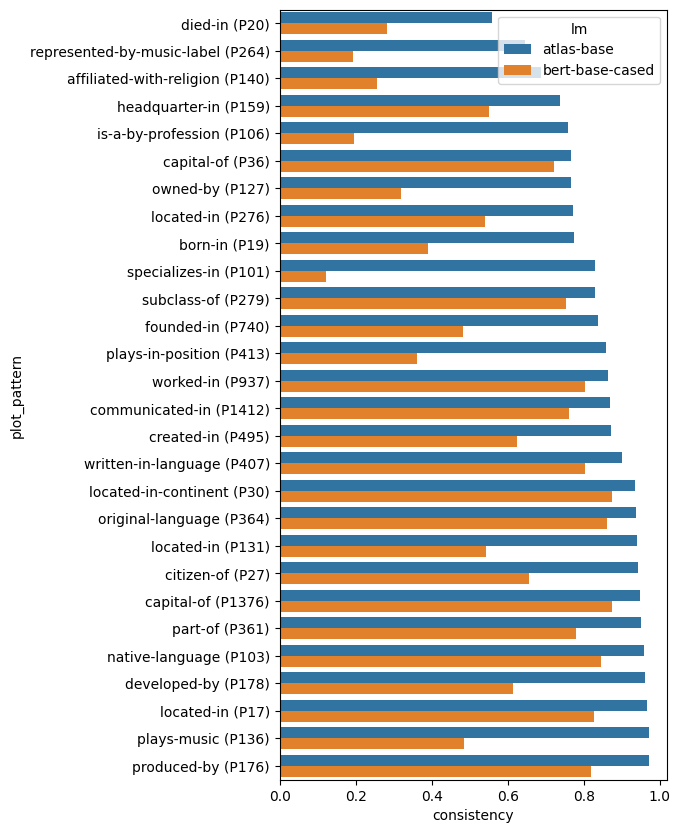

In [14]:
plt.figure(figsize=(5,10))
tmp_data = data.copy()
tmp_data["plot_pattern"] = tmp_data.pattern.apply(lambda val: f"{relations[val]} ({val})") 

order = np.argsort(data[data.lm=="atlas-base"].consistency.values)
sns.barplot(data=tmp_data, x="consistency", y="plot_pattern", hue="lm", order=tmp_data.plot_pattern.iloc[order])

<Axes: xlabel='lama_acc', ylabel='plot_pattern'>

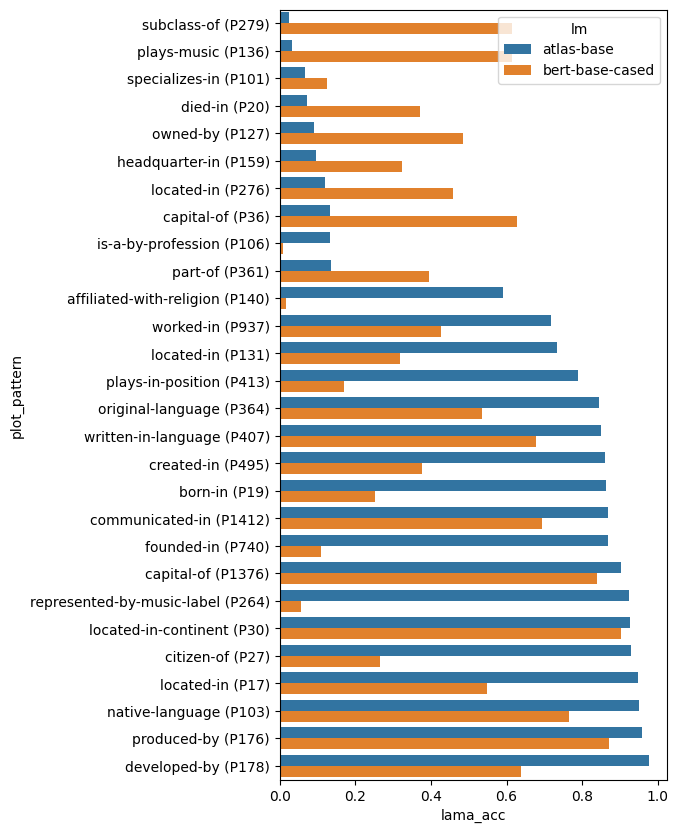

In [13]:
plt.figure(figsize=(5,10))
order = np.argsort(data[data.lm=="atlas-base"].lama_acc.values)
sns.barplot(data=tmp_data, x="lama_acc", y="plot_pattern", hue="lm", order=tmp_data.plot_pattern.iloc[order])#, col="lm")